<a href="https://colab.research.google.com/github/OmarKhaledAbdlhafez/binary_classifier_data/blob/master/binary_classifier_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# **Introduction**
 
Given the training and validation datasets, http://bit.ly/widebot-new-binclf-data  , Create and train a machine learning model using the training set that performs well on the validation set. You should decide on the metrics of "performance" yourself, We will assess your decision.



In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# **Exploratory data analysis**

load the dataset and explor it and extract information 


In [ ]:
df = pd.read_csv('training.csv',sep=';')
df.head()

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable18,variable19,classLabel
0,a,"17,92","5,4e-05",u,g,c,v,"1,75",f,t,1,t,g,80.0,5,800000.0,t,0,no.
1,b,"16,92","3,35e-05",y,p,k,v,"0,29",f,f,0,f,s,200.0,0,2000000.0,NaN,0,no.
2,b,"31,25","0,0001125",u,g,ff,ff,0,f,t,1,f,g,96.0,19,960000.0,t,0,no.
3,a,"48,17","0,0001335",u,g,i,o,"0,335",f,f,0,f,g,0.0,120,0.0,NaN,0,no.
4,b,"32,33","0,00035",u,g,k,v,"0,5",f,f,0,t,g,232.0,0,2320000.0,f,0,no.


In [ ]:
df.describe()

,variable11,variable14,variable15,variable17,variable19
count,3700.000000,3600.000000,3700.000000,3.600000e+03,3700.000000
mean,4.160000,162.695000,2246.705946,1.626950e+06,0.925405
std,6.750553,156.045682,8708.571126,1.560457e+06,0.262772
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,0.000000,0.000000,0.000000,0.000000e+00,1.000000
50%,2.000000,120.000000,113.000000,1.200000e+06,1.000000
75%,6.000000,280.000000,1059.750000,2.800000e+06,1.000000
max,67.000000,1160.000000,100000.000000,1.160000e+07,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3700 entries, 0 to 3699
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   variable1   3661 non-null   object 
 1   variable2   3661 non-null   object 
 2   variable3   3700 non-null   object 
 3   variable4   3636 non-null   object 
 4   variable5   3636 non-null   object 
 5   variable6   3634 non-null   object 
 6   variable7   3634 non-null   object 
 7   variable8   3700 non-null   object 
 8   variable9   3700 non-null   object 
 9   variable10  3700 non-null   object 
 10  variable11  3700 non-null   int64  
 11  variable12  3700 non-null   object 
 12  variable13  3700 non-null   object 
 13  variable14  3600 non-null   float64
 14  variable15  3700 non-null   int64  
 15  variable17  3600 non-null   float64
 16  variable18  1555 non-null   object 
 17  variable19  3700 non-null   int64  
 18  classLabel  3700 non-null   object 
dtypes: float64(2), int64(3), ob

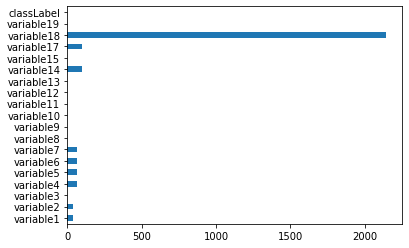

In [ ]:
df.isnull().sum().plot(kind='barh')

yes.    3424
no.      276
Name: classLabel, dtype: int64


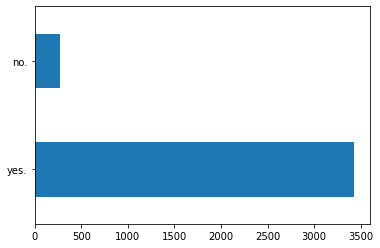

In [ ]:
print(df['classLabel'].value_counts())
df['classLabel'].value_counts().plot(kind='barh')

In [ ]:
num=[ 'variable14', 'variable15','variable17','variable19']
cat=['variable1','variable4','variable5','variable6','variable7','variable9','variable10','variable12','variable13']

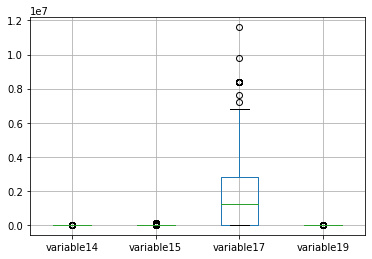

In [ ]:
df.boxplot(column=num)

In [ ]:
!pip install dabl

     |████████████████████████████████| 563kB 4.9MB/s 
  Created wheel for dabl: filename=dabl-0.1.8-cp36-none-any.whl size=565076 sha256=31673039f05c78f112375cb4f1f224a71a72db4ee5287831fe9d2514c55f01a7
  Stored in directory: /root/.cache/pip/wheels/99/8c/79/9d33959b9b8676bf88a2e792075a2a17eda6b1711dc0fedca3
Successfully built dabl


Target looks like classification
Linear Discriminant Analysis training set score: 0.500


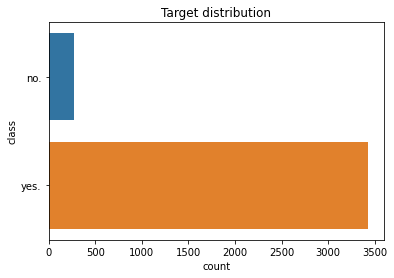

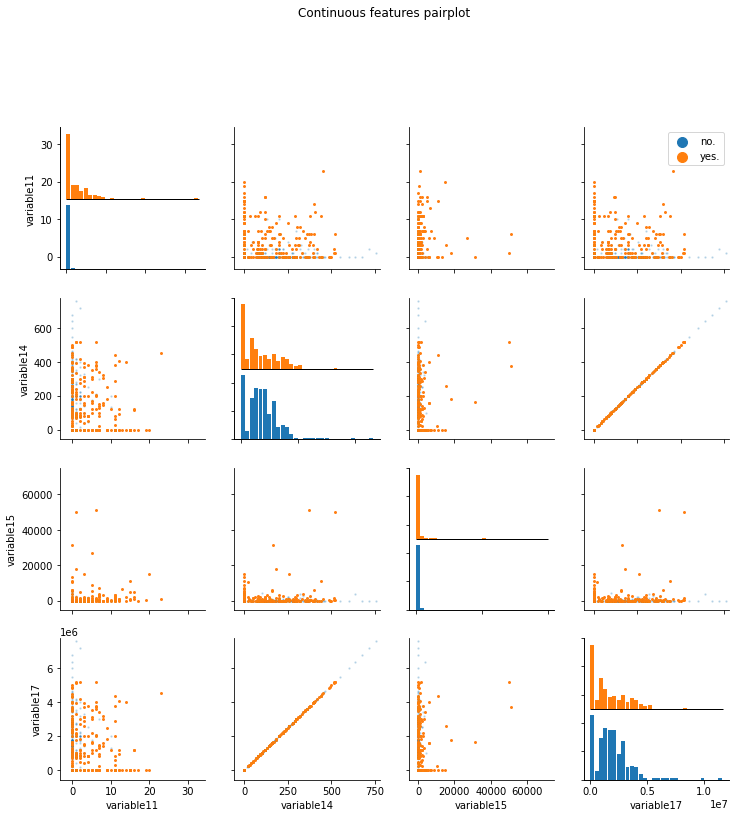

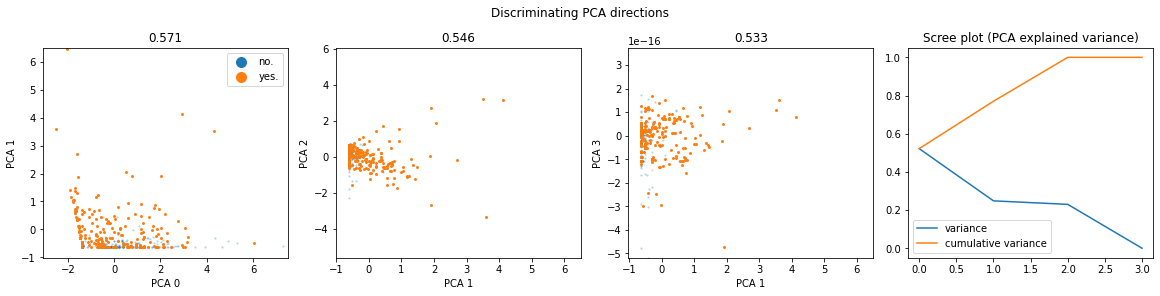

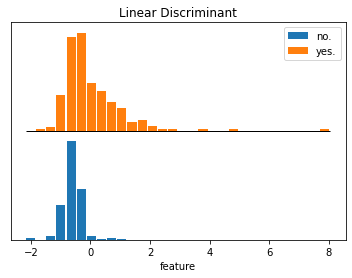

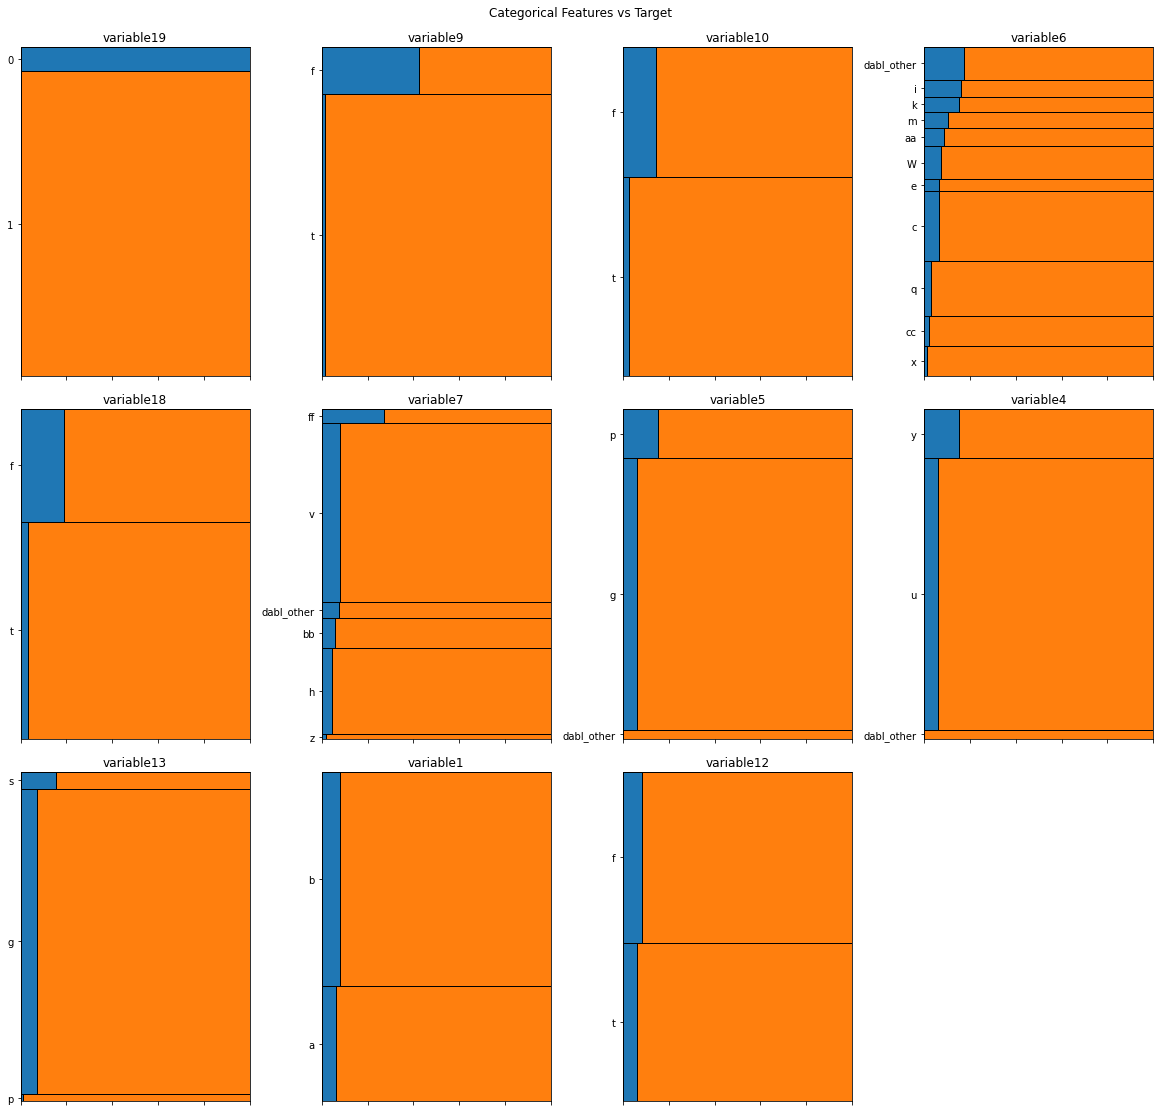

In [ ]:
from dabl import plot
plot(df, target_col='classLabel')

In [ ]:
val_df=pd.read_csv('validation.csv',sep=';')

from this section its look like that the dataset has a lot of missing data  
- column which called variable18 has more than half nan rows
- it seems that the numerical columns has outliers 
- var 2 & 3 & 8 i can't determine how to use them they contain alot of number i can't replace , with . and make it a single number and also thinking of split each column   i can't decide the pattern of the col. and i don't any information about the problem to guess the col. determine which feature so i prefer to drop them 
- the problem here is an imbalanced target  




# **Clean & Prepare the data set**

- imputer the missing data for the categorical columns by put the most freq. in col. 
- imputer the missing data for the numerical  columns by put the  mean  in col. 
- scaling numerical  data by using the centering and scaling statistics of this scaler are based on percentiles and are therefore not influenced by a few number of very large marginal outliers.
- using the one hot encoder for the categorical columns
- Finally drop the old columns and keep the new ones 

In [ ]:
df['classLabel'].replace({'yes.':1,'no.':0},inplace=True)
y = df['classLabel']
data = df.drop(['classLabel','variable18','variable2','variable3','variable8'],axis=1)
val_df['classLabel'].replace({'yes.':1,'no.':0},inplace=True)
y_val = val_df['classLabel']
val_data = val_df.drop(['classLabel','variable18','variable2','variable3','variable8'],axis=1)

In [ ]:
for x in cat :
  data[x].fillna(data[x].value_counts().idxmax(), inplace=True)
  val_data[x].fillna(val_data[x].value_counts().idxmax(), inplace=True)

In [ ]:
for i in num:
  data[i].fillna(data[i].mean(), inplace=True)
  val_data[i].fillna(val_data[i].mean(), inplace=True)

In [ ]:
sc = RobustScaler()
data[num]= sc.fit_transform(data[num])
val_data[num]= sc.fit_transform(val_data[num])

In [ ]:
data.head()

,variable1,variable4,variable5,variable6,variable7,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable19
0,a,u,g,c,v,f,t,1,t,g,-0.145985,-0.101911,-0.145985,-1.0
1,b,y,p,k,v,f,f,0,f,s,0.291971,-0.106629,0.291971,-1.0
2,b,u,g,ff,ff,f,t,1,f,g,-0.087591,-0.088700,-0.087591,-1.0
3,a,u,g,i,o,f,f,0,f,g,-0.437956,0.006605,-0.437956,-1.0
4,b,u,g,k,v,f,f,0,t,g,0.408759,-0.106629,0.408759,-1.0


In [ ]:
ohe = OneHotEncoder()
ohe.fit(data[cat])
ohe_df = pd.DataFrame(ohe.transform(data[cat]).toarray())
data= data.join(ohe_df)
data= data.drop(cat,axis=1)
data.head()

,variable11,variable14,variable15,variable17,variable19,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,1,-0.145985,-0.101911,-0.145985,-1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1,0,0.291971,-0.106629,0.291971,-1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1,-0.087591,-0.088700,-0.087591,-1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
3,0,-0.437956,0.006605,-0.437956,-1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0,0.408759,-0.106629,0.408759,-1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


In [ ]:
ohe_val = pd.DataFrame(ohe.transform(val_data[cat]).toarray())
val_data= val_data.join(ohe_val)
val_data= val_data.drop(cat,axis=1)

# **Model**
- split data in train and test with stratify the target to little overcome the imbalanced data problem 
-using Svm classifier to train and evaluate it on the validation data 
  - using class_weight to overcome the imbalanced 
  - f1 metric is good metric to use with imbalanced data 
  - can use GridSearchCv to try the other kernel for svm and other degree or gamma but poly kernel with degree =2 achieve good  accuracy 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data,y,test_size=.33,random_state=42,stratify=y)  

In [ ]:
clf= SVC(kernel='poly',degree=2,class_weight='balanced')
clf.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 90   1]
 [299 831]]
              precision    recall  f1-score   support

           0       0.23      0.99      0.38        91
           1       1.00      0.74      0.85      1130

    accuracy                           0.75      1221
   macro avg       0.62      0.86      0.61      1221
weighted avg       0.94      0.75      0.81      1221



In [ ]:
print(clf.score(val_data,y_val))
y_val_pred = clf.predict(val_data)
print(confusion_matrix(y_val,y_val_pred))
print(classification_report(y_val,y_val_pred))

0.825
[[86 21]
 [14 79]]
              precision    recall  f1-score   support

           0       0.86      0.80      0.83       107
           1       0.79      0.85      0.82        93

    accuracy                           0.82       200
   macro avg       0.82      0.83      0.82       200
weighted avg       0.83      0.82      0.83       200

